# Predominance Area Diagram

This is done as a programming assignment of MM 209

> 180110008 - **Akshit Srivastava** <br/>
> 180110060 - **Rathod Hardh Dinesh** <br />
> 180110090 - **T Sanjev Vishnu** <br/>

In [127]:
import numpy as np
import matplotlib.pyplot as plt

Defining the constant R as 8.314

In [128]:
R = 8.314

### Reaction 5

> Zn + 0.5 O<sub>2</sub> = ZnO

The function <code>equilibirum_lnpO2_5</code> returns the equilibrium value of **ln p<sub>O<sub>2</sub></sub>** at a particular <code>temperature</code>

In [129]:
G5_0 = -413495

In [130]:
def delG5(temperature):
  T = temperature
  G5 = -348276 + 100.505 * T 
  return G5 

In [131]:
def equilibrium_lnpO2_5(temperature):
  lnpO2 = (2 * (G5_0 - delG5(temperature)))/(R*temperature)
  return lnpO2

### Reaction 6

> Zn + SO<sub>2</sub> = ZnS + O<sub>2</sub>

The function <code>equilibirum_lnpO2_6</code> returns the equilibrium value of **ln p<sub>O<sub>2</sub></sub>** at a particular <code>temperature</code>

In [132]:
G6_0 = 3723

In [133]:
def delG6(temperature):
  T = temperature
  G6 = 90851.4 + 26.973 * T
  return G6

In [134]:
def equilibrium_lnpO2_6(temperature, lnpO2):
  lnpSO2 = lnpO2 - (-G6_0 + delG6(temperature))/(R*temperature)
  return lnpSO2

### Reaction 2

> ZnS + 2 O<sub>2</sub> = ZnSO<sub>4</sub>

The function <code>equilibirum_lnpO2_2</code> returns the equilibrium value of **ln p<sub>O<sub>2</sub></sub>** at a particular <code>temperature</code>

In [135]:
G2_0 = -874456 - (-201292.24)

In [136]:
def delG2(temperature):
  T = temperature
  G2 = -776844 + 339.765 * T
  return G2

In [137]:
def equilibrium_lnpO2_2(temperature):
  lnpO2 = (G2_0 - delG2(temperature) )/ (2*R*temperature)
  return lnpO2

### Reaction 3

> ZnO + SO<sub>2</sub> + 0.5 O<sub>2</sub> = ZnSO<sub>4</sub>

The function <code>equilibirum_lnpSO2_3</code> takes input<br/>
> <code>temperature</code><br/>
> <code>lnpO2</code> which is ln p<sub>O<sub>2</sub></sub> <br/>

returns the equilibrium value of 
**ln p<sub>SO<sub>2</sub></sub>** 
at a the input conditions

In [138]:
G3_0 = -874456 - (-300193.632) - (-318318.732)

In [139]:
def delG3(temperature):
  T = temperature
  G3 = -337710 + 266.26 * T
  return G3

In [140]:
def equilibrium_lnpSO2_3(temperature, lnpO2):
  lnpSO2 = (G3_0 - delG3(temperature))/(R*temperature) - (lnpO2/2)
  return lnpSO2


### Reaction 4 
> 2 ZnS + 3 O<sub>2</sub> = 2 ZnO + 2 SO<sub>2</sub> 

The function <code>equilibirum_lnpSO2_3</code> takes input<br/>
> <code>temperature</code><br/>
> <code>lnpO2</code> which is ln p<sub>O<sub>2</sub></sub> <br/> 

returns the equilibrium value of **ln p<sub>SO<sub>2</sub></sub>** at a the input conditions

In [141]:
G4_0 = ((-300193.632) + (-318318.732)) - ((-201292.24))

In [142]:
def delG4(temperature):
  T = temperature
  G4 = -439127 + 73.532 * T
  return G4

In [143]:
def equilibrium_lnpSO2_4(temperature, lnpO2):
  lnpSO2 = 1.5 * lnpO2 + (-G4_0 + delG4(temperature))/(R * temperature)
  return lnpSO2

## Predominance Area Diagram
---
The function takes `temperature` as input and plots PAD


> First we calculate the equilibrium ln p<sub>O<sub>2</sub></sub> for the reaction 1 and reaction 2 and store it in variables `p1` and `p2` <br/>
> Now to plot accordingly, `lnpO2_range` *(the range of ln p<sub>O<sub>2</sub></sub>)* over which ln p<sub>SO<sub>2</sub></sub> is calculated. <br/>
> `lnpSO2_range` is calculated by invoking `equilibrium_lnpSO2_3` over the range `lnpO2_range` and specified `temperature` <br/>
>> 2 vertical lines of equilibirum are plotted at ln p<sub>O<sub>2</sub></sub> = `p1` and `p2` <br/>
>> The equilibrium line which is `lnpO2_range` is plotted against `lnpSO2_range`


In [160]:
def pad(temperature, x_beginning = 0 , x_end = 0, accuracy = 1000):

  lnpSO2_range = []
  lnpSO2_range2 = []
  newgraph = []

  p0 = equilibrium_lnpO2_5(temperature)
  p1 = equilibrium_lnpO2_2(temperature)

  lp = x_beginning
  hp = x_end

  if lp==0 and hp==0:
    lp = p0 -7
    hp = p1 +7

  lnpO2_range = np.linspace(lp, hp, accuracy)

  index = 0
  index_ = 0

  for lnpO2 in lnpO2_range:
    lnpSO2_range.append(equilibrium_lnpSO2_3(temperature, lnpO2))
    lnpSO2_range2.append(equilibrium_lnpSO2_4(temperature, lnpO2))
    newgraph.append(equilibrium_lnpO2_6(temperature, lnpO2))
    if lnpO2 < p1 :
      index += 1
    if lnpO2 < p0 :
      index_ += 1

  plt.xlabel("ln pO2")
  plt.ylabel("ln pSO2")
  plt.title("Predominance Area Diagram at "+str(temperature)+" K")  
  plt.vlines([p1], ymin = equilibrium_lnpSO2_3(temperature, equilibrium_lnpO2_2(temperature)), ymax= max(max(lnpSO2_range),max(lnpSO2_range2)), color = "mediumorchid", ls="-", label = "ZnS - ZnSO4")
  plt.plot(lnpO2_range[index:], lnpSO2_range[index:], "-", color = "dodgerblue", label = "ZnO - ZnSO4")
  plt.plot(lnpO2_range[index_:index], lnpSO2_range2[index_:index], "-", color = "deeppink", label = "ZnS - ZnO")
  plt.vlines([p0], ymin = min(min(lnpSO2_range),min(lnpSO2_range2)), ymax= equilibrium_lnpSO2_4(temperature, p0), color = "lightpink", ls="-", label = "Zn - ZnO")
  plt.plot(lnpO2_range[:index_], newgraph[:index_], "-", color = "midnightblue", label = "Zn - ZnS")
  plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

# Specify a temperature and call the function to plot the diagram

The input variables are `temperature`, `x_beginning`, `x_end`, `accuracy`. The higher the accuracy specified the more continuous the graph is. <br/>

`x_beginning` and `x_end` are the range of ln p<sub>O<sub>2</sub></sub> over which you want you the Predominance Area Diagram. Be default it has been set in such a way to give a good visual representation.

`accuracy` values lesser than `100` yield unsatisfactory results at the point where the three curves supposedly intersect. <br/>

The default value for `accuracy` is set as `1000`. The computational time is large for values greater than `100000`. <br/>

`temperature` is mandatory.

Here are some example plots with different ranges of pO2 and temperatures

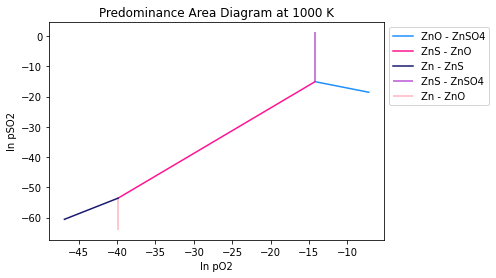

In [161]:
pad(1000)

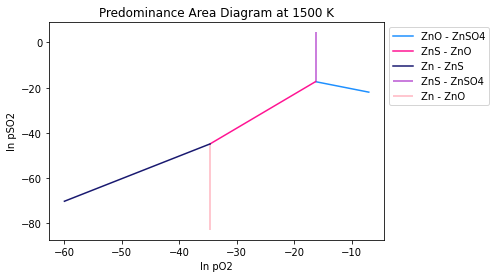

In [162]:
pad(1500, -60, -7)

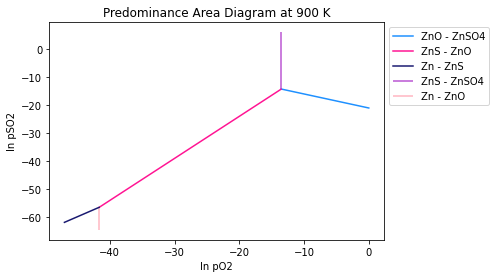

In [163]:
pad(900, x_beginning= -47, x_end = 0)

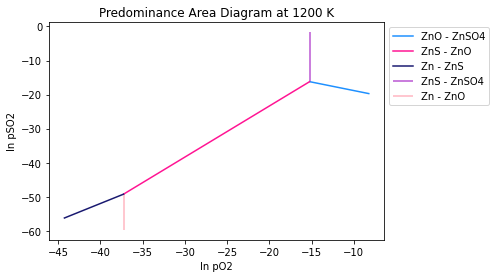

In [164]:
pad(1200)